In [13]:
#MC model
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def geo_paths(S, T, r, q, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    #sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps #计算时间步长
    # S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
    ST = np.log(S) +  np.cumsum(((r - q - sigma**2/2)*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=(steps,N))),axis=0) 
    #ST是一个矩阵，用来储存资产路径（漂移项+扩散项）
    
    return np.exp(ST)

def black_scholes(S,K,T,r,q,sigma,property):
    """
    Output is the value of the option 
    """
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    
    if property == "call":
        call_price = S * np.exp(-q*T)* norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
        return call_price
    else:
         put_price = K * np.exp(-r*T)*norm.cdf(-d2) - S * np.exp(-q*T)* norm.cdf(-d1)
         return put_price

call price by BS model is 3.859759950774997
put price by BS model is 12.138866898974783
Simulated price is 3.8917161033911185


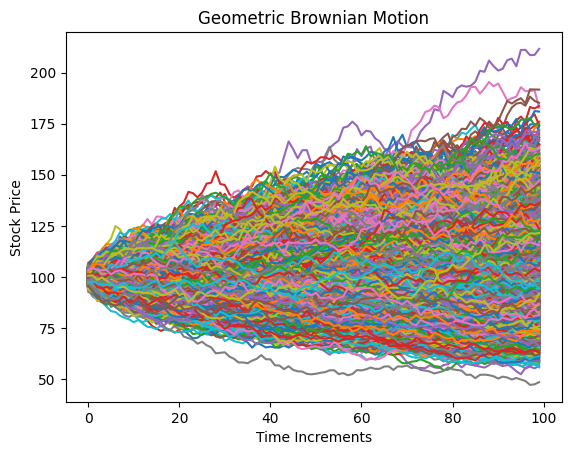

In [14]:
'''

'''
S = 100 #stock price S_{0}
K = 110 # strike
T = 1/2 # time to maturity (year)
r = 0.05 # risk free risk in annual %
q = 0.02 # annual dividend rate
sigma = 0.25 # annual volatility in %
steps = 100 # time steps
N = 10000 # number of trials

paths= geo_paths(S,T,r, q,sigma,steps,N)

plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")

#use monte carlo simulation to generate the option price
payoffs = np.maximum(paths[-1]-K, 0)
option_price = np.mean(payoffs)*np.exp(-r*T) #discounting back to present value

#use black_scholes_call method to generate the option price 
bs_price_call = black_scholes(S,K,T,r,q,sigma,"call")
bc_price_put = black_scholes(S,K,T,r,q,sigma,"put")

print(f"call price by BS model is {bs_price_call}")
print(f"put price by BS model is {bc_price_put}")
print(f"Simulated price is {option_price}")

In [ ]:
n, bins, patches = plt.hist(paths[-1],bins=250);
for c, p in zip(bins, patches):
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'red')

plt.axvline(K, color='black', linestyle='dashed', linewidth=2,label="Strike")
plt.title("Distribution of $S_{T}$")
plt.xlabel("$S_{T}$")
plt.ylabel('Count')
plt.legend()